# Excercise 2 - Regularized Logistic regression

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 6,5

In [2]:
# Load data from file
data = pd.read_csv('ex2data2.txt', header=None, names=['Test 1', 'Test 2', 'Accepted'])
data.head()

Test 1   Test 2  Accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1

Visualizing the data

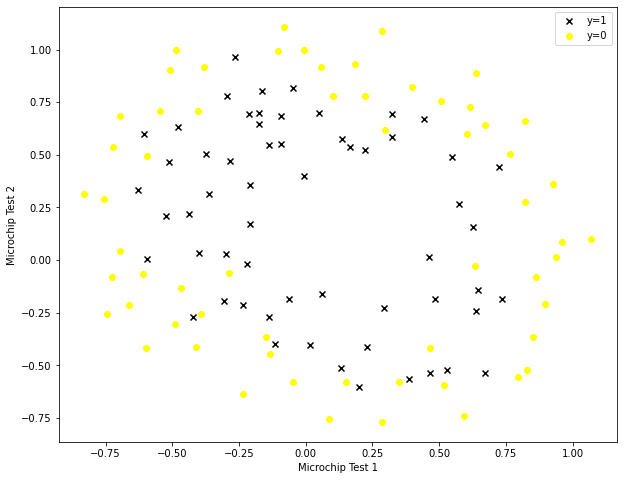

In [3]:
# Find all data points with positive and negative accepted results respectively
pos = data[data['Accepted'].isin([1])]
neg = data[data['Accepted'].isin([0])]

# Plot data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pos['Test 1'], pos['Test 2'], marker='x', color='black', label='y=1')
ax.scatter(neg['Test 1'], neg['Test 2'], marker='o', color='yellow', label='y=0')
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
ax.legend()

Feature mapping

In [4]:
def map_feature(X1, X2):
    degree = 6
    out = np.ones((X1.size, 1))

    # NOTE: +1 because of differences in Python not counting last number in range
    for i in range(1, degree+1, 1):
        for j in range(0, i+1, 1):
            tmp = np.multiply((X1**(i-j)),  (X2**j))
            tmp = tmp.reshape((X1.size, 1))
            out = np.hstack([out, tmp])

    return out

X = map_feature(data['Test 1'].values, data['Test 2'].values)
y = data['Accepted'].values

m, n = X.shape
initial_theta = np.zeros((n,1))
lam = 1

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_fn_reg(theta, X, y, learning_rate):
    h = sigmoid(X @ theta)
    reg = learning_rate/(2*m) * np.sum(np.power(theta[1:n], 2))
    J = (1/m)*np.sum(np.multiply(-y,np.log(h)) - np.multiply(1-y,np.log(1-h))) + reg
    return J

def grad_fn_reg(theta, X, y, learning_rate):
    h = sigmoid(X @ theta)
    grad = np.zeros((n, 1))
    for i in range(n):
        error = np.subtract(h,y).reshape((m,1))
        x_col = X[:,i].reshape((m,1))
        grad[i] = (1/m) * np.sum(np.multiply(error, x_col)) + learning_rate/m * theta[i]
    
    grad[0] = (1/m) * np.sum(np.multiply(h-y, X[:,0]))
    return grad

initial_theta = initial_theta.flatten()
y = y.flatten()

cost = cost_fn_reg(initial_theta, X, y, lam)
grad = grad_fn_reg(initial_theta, X, y, lam)

print('Cost at initial theta (zeros): %f\n', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
for i in range(5):
    print(' %.4f' % grad[i])
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')


Cost at initial theta (zeros): %f
 0.6931471805599454
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



Regularization and accuracies